In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [1]:
# Function to load a dictionary from a file
def load_dictionary(file_path):
    with open(file_path, 'rb') as file:
        dictionary = pickle.load(file)
    print(f"Dictionary loaded from {file_path}")
    return dictionary

experiments = load_dictionary(file_path='experiment (1).pkl')

Dictionary loaded from experiment (1).pkl


In [3]:

df = pd.DataFrame(experiments['experiments'])
df

,epsilon,alpha,num_iter,model,delta,accuracy
0,0.05,0.001,5,sequential,"[[[tensor([-0.0490, -0.0490, -0.0490, -0.0500,...",0.087082
1,0.05,0.001,5,joint,"[[[tensor([ 0.0500, -0.0500, -0.0500, -0.0490,...",0.986067
2,0.05,0.001,5,CNN,"[[[tensor([ 0.0260, -0.0490, -0.0500, -0.0170,...",0.985768
3,0.05,0.001,10,sequential,"[[[tensor([-0.0500, -0.0500, -0.0500, -0.0500,...",0.089172
4,0.05,0.001,10,joint,"[[[tensor([ 0.0500, -0.0500, -0.0490, -0.0480,...",0.986963
...,...,...,...,...,...,...
103,0.30,0.100,10,joint,"[[[tensor([ 3.0000e-01, 3.0000e-01, 3.0000e-...",0.320860
104,0.30,0.100,10,CNN,"[[[tensor([-0.2000, 0.0000, 0.0000, 0.3000,...",0.228105
105,0.30,0.100,20,sequential,"[[[tensor([-3.0000e-01, 3.0000e-01, 3.0000e-...",0.075239
106,0.30,0.100,20,joint,"[[[tensor([ 3.0000e-01, 3.0000e-01, 3.0000e-...",0.321557


# Checking the accuracy of the models with different epsilons

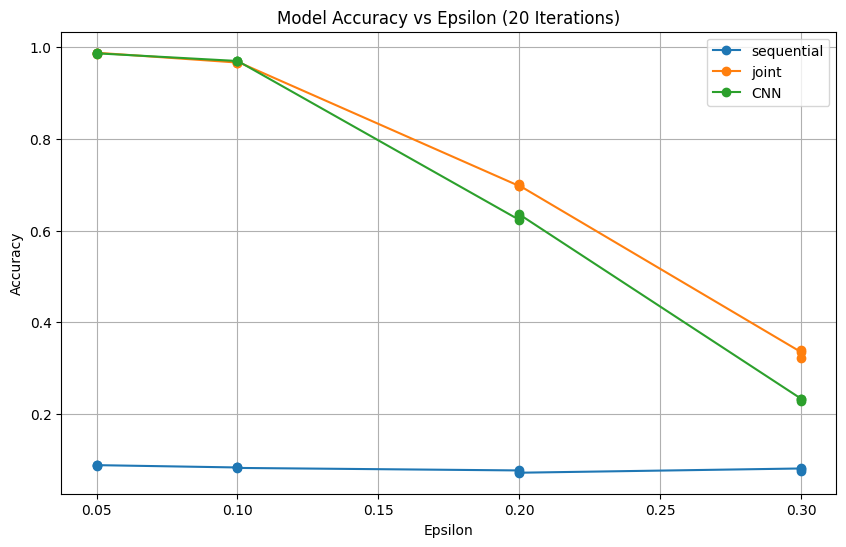

In [5]:


# Filter the experiments for those with 20 iterations
df_20_iterations = df[df['num_iter'] == 20]

# Now plot the accuracy for different epsilons for this subset
plt.figure(figsize=(10, 6))

# Assuming 'model' is a column with the model's name
for model_name in df_20_iterations['model'].unique():
    model_data = df_20_iterations[df_20_iterations['model'] == model_name]
    plt.plot(model_data['epsilon'], model_data['accuracy'], marker='o', label=model_name)

plt.title('Model Accuracy vs Epsilon (20 Iterations)')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


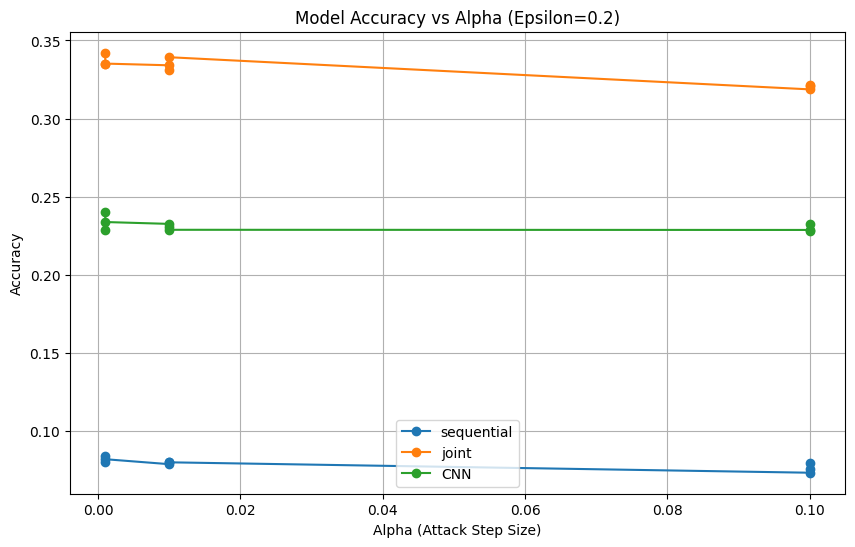

In [9]:

# Filter the DataFrame for experiments where epsilon is 0.2
df_epsilon_02 = df[df['epsilon'] == 0.2]

# Now plot the accuracy for different alphas for this subset
plt.figure(figsize=(10, 6))

# Loop through each unique model in the filtered DataFrame
for model_name in df_epsilon_02['model'].unique():
    # Extract data for the current model
    model_data = df_epsilon_02[df_epsilon_02['model'] == model_name]
    # Sort the data by alpha to ensure a proper line plot
    model_data_sorted = model_data.sort_values('alpha')
    # Plotting the line graph
    plt.plot(model_data_sorted['alpha'], model_data_sorted['accuracy'], marker='o', label=model_name)

# Adding plot title and labels
plt.title('Model Accuracy vs Alpha (Epsilon=0.2)')
plt.xlabel('Alpha (Attack Step Size)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Experiment 4

In [20]:
!pip uninstall pillow

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Would remove:
    /home/mohamed/.local/lib/python3.7/site-packages/PIL/*
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow-9.5.0.dist-info/*
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libXau-154567c4.so.6.0.0
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libbrotlicommon-92722cb2.so.1
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libbrotlidec-db4b3db6.so.1.0.9
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libfreetype-cb9caf6f.so.6.19.0
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libharfbuzz-3543f599.so.0.60710.0
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/libjpeg-f2134fdd.so.62.3.0
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/liblcms2-12745711.so.2.0.15
    /home/mohamed/.local/lib/python3.7/site-packages/Pillow.libs/liblzma-95592ee6.so.5.4.2
    /home/mohamed/.local/l

In [17]:
import pandas as pd

df = pd.read_csv('../results/Experiment 4/concept-MNIST.csv')
df

,num_of_new_concepts,Sequential model accuracy on normal images,Joint model accuracy on normal images,CNN model accuracy on normal images,Sequential model accuracy on adversarial images,Joint model accuracy on adversarial images,CNN model accuracy on adversarial images,Sequential model accuracy on normal images after adversarial training,Joint model accuracy on normal images after adversarial training,CNN model accuracy on normal images after adversarial training,Sequential model accuracy on adversarial images after adversarial training,Joint model accuracy on adversarial images after adversarial training,CNN model accuracy on adversarial images after adversarial training
0,0,0.984674,0.983877,0.986764,0.106190,0.127389,0.104996,0.774980,0.915605,0.820561,0.628284,0.505971,0.713376
1,1,0.984475,0.980892,0.984574,0.140426,0.123905,0.106290,0.933021,0.940585,0.840167,0.361465,0.418591,0.734375
2,2,0.984773,0.983380,0.985072,0.215068,0.119626,0.110370,0.896895,0.898089,0.868133,0.474224,0.508459,0.782942
3,3,0.984176,0.983181,0.984076,0.238455,0.109972,0.111266,0.885052,0.849423,0.864451,0.521397,0.364849,0.668989
4,4,0.983778,0.981489,0.984375,0.181827,0.242138,0.103802,0.964769,0.938893,0.851811,0.438097,0.454518,0.665705
5,5,0.983479,0.980195,0.984375,0.308818,0.141222,0.129080,0.941680,0.880374,0.901174,0.547174,0.533141,0.612560
6,6,0.980593,0.981290,0.985470,0.141322,0.288018,0.105693,0.871517,0.700338,0.887540,0.364451,0.549960,0.615048
7,7,0.983081,0.979299,0.984873,0.244228,0.112958,0.104498,0.811206,0.931827,0.866441,0.462182,0.466660,0.757365
8,8,0.982882,0.981887,0.983977,0.104996,0.228702,0.123308,0.797273,0.664411,0.880076,0.463973,0.596139,0.718153


In [18]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['num_of_new_concepts'], df['Sequential model accuracy on adversarial images'], label='Sequential Model', marker='o')
plt.plot(df['num_of_new_concepts'], df['Joint model accuracy on adversarial images'], label='Joint Model', marker='o')
plt.plot(df['num_of_new_concepts'], df['CNN model accuracy on adversarial images'], label='CNN Model', marker='o')

plt.xlabel('Number of New Concepts')
plt.ylabel('Accuracy on Adversarial Images')
plt.title('Model Accuracy on Adversarial Images vs Number of Concepts')
plt.legend()
plt.grid(True)
plt.show()

ImportError: cannot import name '_imaging' from 'PIL' (/usr/lib/python3/dist-packages/PIL/__init__.py)